# Simple Model for Heart Disease Death Prediction

## Heart Disease Death Prediction using TensorFlow 2.0

This notebook demonstrates a simple yet powerful machine learning pipeline for predicting heart disease using TensorFlow 2.0. The example uses the Heart Disease Dataset, which includes clinical and demographic factors, to classify the presence of heart disease.

- Dataset preprocessing with `pandas` and `scikit-learn`.
- Neural network construction using `tf.keras.Sequential`.
- Model evaluation using metrics like accuracy and loss.

## Dataset Overview
The *Heart Disease Dataset* contains attributes such as:
- Age
- anaemia
- creatinine_phosphokinase
- diabetes
- ejection_fraction
- high_blood_pressure
- platelets
- serum_creatinine
- sex
- serum_sodium
- smoking
- time
- DEATH_EVENT

Let's dive in!


Now, let's implement a neural network for predicting heart disease!


## Installation of tensorflow 

In [7]:
!pip install tensorflow

## Import libraries

In [9]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Data.csv")

In [38]:
from IPython.display import Image, display
url = "https://media.geeksforgeeks.org/wp-content/uploads/20240601001059/FNN.jpg"
display(Image(url=url))
#source : geeksforgeeks

In [35]:
X_train.shape

(239, 12)

Epoch 1/50


C:\Users\lenin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4837 - loss: 0.7573 - val_accuracy: 0.4167 - val_loss: 0.8414
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4920 - loss: 0.7556 - val_accuracy: 0.5417 - val_loss: 0.7860
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5834 - loss: 0.6911 - val_accuracy: 0.5625 - val_loss: 0.7434
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6132 - loss: 0.6633 - val_accuracy: 0.5417 - val_loss: 0.7041
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7530 - loss: 0.6238 - val_accuracy: 0.5833 - val_loss: 0.6729
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7563 - loss: 0.6057 - val_accuracy: 0.6250 - val_loss: 0.6470
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7674 - loss: 0.5864 - val_accuracy: 0.6875 - val_loss: 0.6246
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7764 - loss: 0.5691 - val_accuracy: 0.7083 - val_loss: 0.6064
Ep

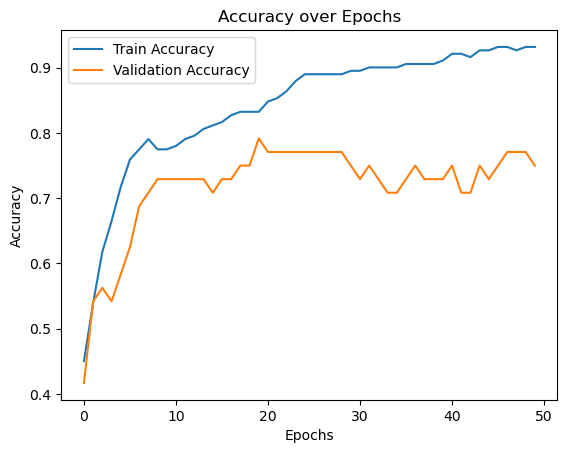

In [31]:
# Split features and labels
X = data.drop('DEATH_EVENT', axis=1).values
y = data['DEATH_EVENT'].values

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model. fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=16)  #An epoch refers to a complete pass through the entire training dataset by the learning algorithm.

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"\nTest Accuracy: {test_acc:.2f}")

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
